In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency, percentileofscore
df = pd.read_pickle('college_data.pkl')
my_top_ten_colleges = ['Massachusetts Institute of Technology', 'Stanford University', 'Harvard University', 'Tufts University', 'University of Chicago', 'Princeton University', 'Yale University', 'Columbia University in the City of New York', 'University of Pennsylvania', 'Brown University']

# Stuyvesant Student Body Information

In [187]:
#Remove duplicates
df_stuy = df.drop_duplicates(subset=['gpa','sat']) #chance of same gpa to 100th and sat is low
print(len(df_stuy)) #2245 is reasonable considering an 800(ish) student body

2245


Average GPA: 92.24675723830751
Average SAT: 1500.2671860678277
Median GPA: 93.41
Median SAT: 1520.0


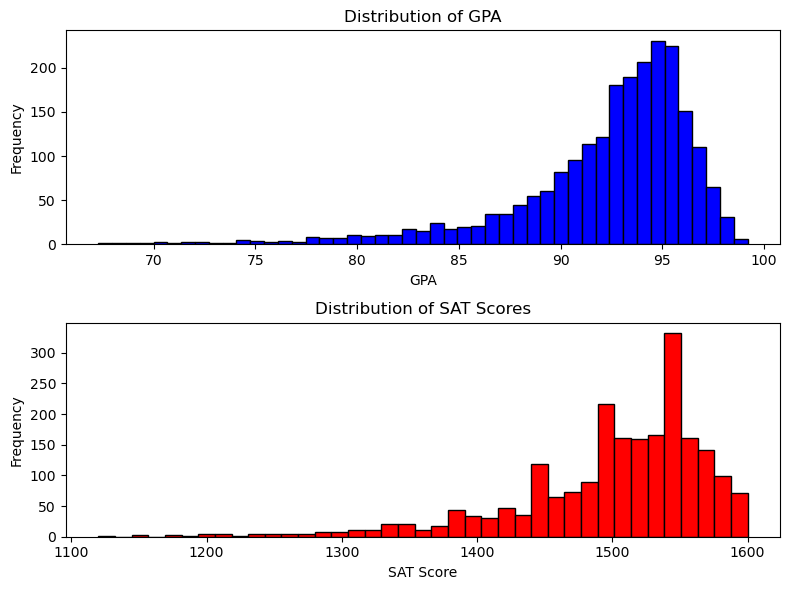

In [188]:
average_gpa = df_stuy['gpa'].mean()
average_sat = df_stuy[df_stuy['sat'] != 0]['sat'].mean() #Students who take the ACT have a 0 SAT score
mean_gpa = df_stuy['gpa'].median()
mean_sat = df_stuy[df_stuy['sat']!=0]['sat'].median()
print(f"Average GPA: {average_gpa}")
print(f"Average SAT: {average_sat}")
print(f"Median GPA: {mean_gpa}")
print(f"Median SAT: {mean_sat}")

#Histogram of GPA
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.hist(df_stuy['gpa'], bins='auto', color='blue', edgecolor='black')
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')

# Histogram of SAT scores
plt.subplot(2, 1, 2)
plt.hist(df_stuy[df_stuy['sat'] != 0]['sat'], bins='auto', color='red', edgecolor='black')
plt.title('Distribution of SAT Scores')
plt.xlabel('SAT Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [189]:
YOUR_GPA = 96.31
YOUR_SAT = 1530

# Ensure your DataFrame is correctly referenced and the columns for GPA and SAT are correctly named.
print(f"You are in the top {100 - percentileofscore(df_stuy['gpa'], YOUR_GPA):.2f}% of students in terms of GPA.")
print(f"You are in the top {100 - percentileofscore(df_stuy['sat'], YOUR_SAT):.2f}% of students in terms of SAT score.")


You are in the top 10.82% of students in terms of GPA.
You are in the top 39.51% of students in terms of SAT score.


# My top ten colleges

In [190]:
df_top_ten = df[df['school'].isin(my_top_ten_colleges)]
df_top_ten_accepted = df_top_ten[(df_top_ten['accepted'] == True) & (df_top_ten['sat'] != 0)]

average_gpa_top_ten = df_top_ten_accepted['gpa'].mean()
average_sat_top_ten = df_top_ten_accepted['sat'].mean()
mean_gpa_top_ten = df_top_ten_accepted['gpa'].median()
mean_sat_top_ten = df_top_ten_accepted['sat'].median()

print(f"Average GPA of top ten colleges: {average_gpa_top_ten}")
print(f"Average SAT of top ten colleges: {average_sat_top_ten}")
print(f"Median GPA of top ten colleges: {mean_gpa_top_ten}")
print(f"Median SAT of top ten colleges: {mean_sat_top_ten}")

Average GPA of top ten colleges: 95.85534526854221
Average SAT of top ten colleges: 1548.772378516624
Median GPA of top ten colleges: 96.0
Median SAT of top ten colleges: 1550.0


In [191]:
df_top_ten_colleges = df_top_ten.groupby('school')
df_top_ten_colleges = df_top_ten_colleges.agg({'gpa': 'mean', 'sat': 'mean', 'act': 'mean', 'accepted': 'sum', 'appType': 'count'})
df_top_ten_colleges = df_top_ten_colleges.rename(columns={'appType': 'applicationCount'})
df_top_ten_colleges['acceptanceRate'] = df_top_ten_colleges['accepted']/df_top_ten_colleges['applicationCount']

In [192]:
df_top_ten_colleges.sort_values(by='acceptanceRate', ascending=True, inplace=True)
df_top_ten_colleges.head(10)

,gpa,sat,act,accepted,applicationCount,acceptanceRate
school,,,,,,
Stanford University,95.137136,1494.090909,7.572727,8,220,0.036364
Columbia University in the City of New York,93.766756,1483.209733,5.434531,37,863,0.042874
University of Pennsylvania,94.033991,1478.185776,7.084180,32,689,0.046444
Brown University,94.366725,1471.411150,6.909408,27,574,0.047038
Princeton University,94.701762,1490.603589,6.848287,34,613,0.055465
Yale University,94.728865,1483.509834,6.804841,52,661,0.078669
Tufts University,93.680876,1461.355932,7.564972,28,354,0.079096
Massachusetts Institute of Technology,94.753088,1510.622120,6.658986,36,434,0.082949
Harvard University,94.620801,1480.213523,7.708185,47,562,0.083630


In [193]:
print(f"Highest mean GPA from my top ten colleges: {df_top_ten_colleges['gpa'].max():.2f} and the college is {df_top_ten_colleges['gpa'].idxmax()}")
print(f"Highest mean SAT from my top ten colleges: {df_top_ten_colleges['sat'].max():.2f} and the college is {df_top_ten_colleges['sat'].idxmax()}")

Highest mean GPA from my top ten colleges: 95.14 and the college is Stanford University
Highest mean SAT from my top ten colleges: 1510.62 and the college is Massachusetts Institute of Technology


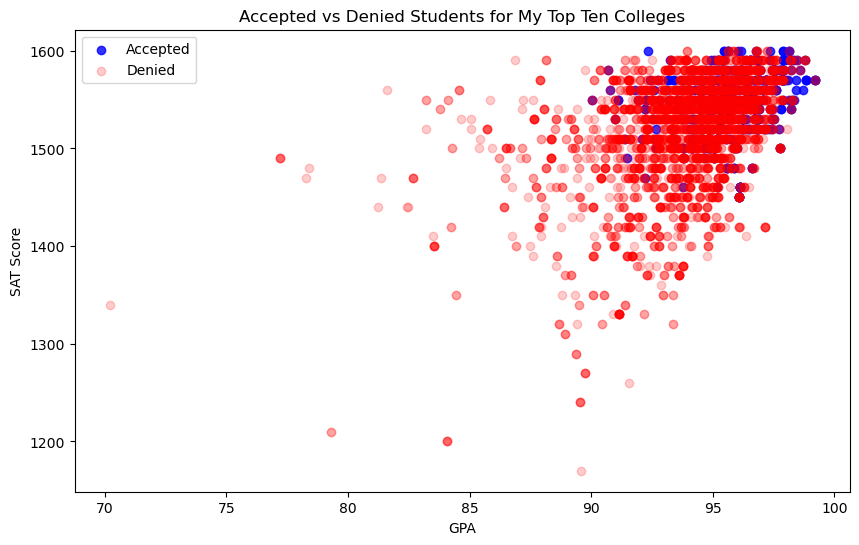

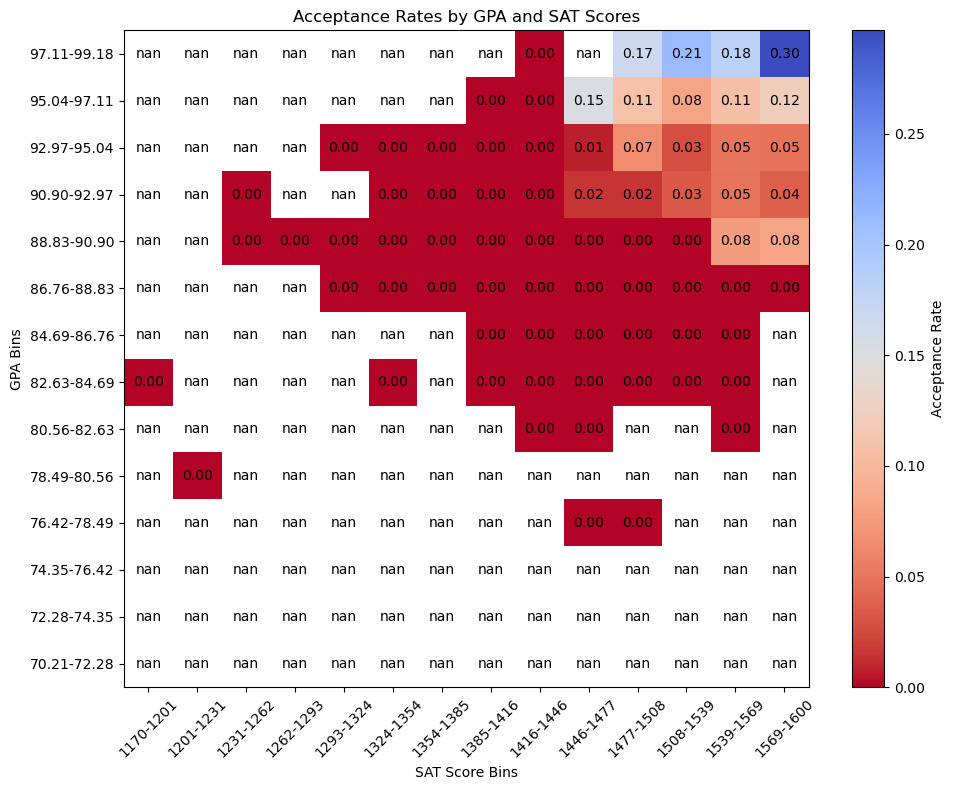

In [194]:
# Filter out students with 0 SAT scores
df_top_ten_filtered = df_top_ten[df_top_ten['sat'] != 0].copy()

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot accepted students
accepted_students = df_top_ten_filtered[df_top_ten_filtered['accepted']]
plt.scatter(accepted_students['gpa'], accepted_students['sat'], color='blue', label='Accepted', alpha=0.8)

# Plot denied students
denied_students = df_top_ten_filtered[~df_top_ten_filtered['accepted']]
plt.scatter(denied_students['gpa'], denied_students['sat'], color='red', label='Denied', alpha=0.2)

plt.title('Accepted vs Denied Students for My Top Ten Colleges')
plt.xlabel('GPA')
plt.ylabel('SAT Score')
plt.legend()

# Create bins for GPA and SAT scores
gpa_bins = np.linspace(df_top_ten_filtered['gpa'].min(), df_top_ten_filtered['gpa'].max(), 15)
sat_bins = np.linspace(df_top_ten_filtered['sat'].min(), df_top_ten_filtered['sat'].max(), 15)

# Assign each student to a bin based on their GPA and SAT score
df_top_ten_filtered.loc[:, 'gpa_bin'] = pd.cut(df_top_ten_filtered['gpa'], bins=gpa_bins)
df_top_ten_filtered.loc[:, 'sat_bin'] = pd.cut(df_top_ten_filtered['sat'], bins=sat_bins)

# Calculate the acceptance rate for each bin
acceptance_rates = df_top_ten_filtered.groupby(['gpa_bin', 'sat_bin'])['accepted'].mean().unstack()

# Create a custom colormap with blue for accepted and red for denied
cmap_flipped = plt.cm.coolwarm.reversed()

# Create the heatmap
plt.figure(figsize=(10, 8))
plt.imshow(acceptance_rates, cmap=cmap_flipped, origin='lower', aspect='auto')
plt.colorbar(label='Acceptance Rate')

# Set the tick labels and positions
plt.xticks(np.arange(len(sat_bins) - 1), labels=[f'{sat_bins[i]:.0f}-{sat_bins[i+1]:.0f}' for i in range(len(sat_bins) - 1)], rotation=45)
plt.yticks(np.arange(len(gpa_bins) - 1), labels=[f'{gpa_bins[i]:.2f}-{gpa_bins[i+1]:.2f}' for i in range(len(gpa_bins) - 1)])

# Add acceptance rate annotations
for i in range(acceptance_rates.shape[0]):
    for j in range(acceptance_rates.shape[1]):
        plt.text(j, i, f'{acceptance_rates.iloc[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Acceptance Rates by GPA and SAT Scores')
plt.xlabel('SAT Score Bins')
plt.ylabel('GPA Bins')
plt.tight_layout()
plt.show()

# Effect of application type on acceptance rate on my top ten colleges

In [195]:
df_appType = df[(df['school'].isin(my_top_ten_colleges)) & (df['sat'] != 0)].groupby('appType')
df_appType = df_appType.agg({'accepted': 'sum', 'appType': 'size', 'sat': 'mean', 'gpa': 'mean'})
df_appType = df_appType.rename(columns={'appType': 'num_applications'})
df_appType['acceptanceRate'] = df_appType['accepted'] / df_appType['num_applications']

In [196]:
df_appType

,accepted,num_applications,sat,gpa,acceptanceRate
appType,,,,,
EA,87,649,1537.889060,94.971957,0.134052
ED,91,413,1527.772397,93.706731,0.220339
RD,213,4211,1524.360009,94.219330,0.050582


In [197]:
# Calculate the number of rejected applications
df_appType['rejected'] = df_appType['num_applications'] - df_appType['accepted']

# Calculate the odds ratios
rd_odds = df_appType.loc['RD', 'acceptanceRate']
ed_odds = df_appType.loc['ED', 'acceptanceRate']
ea_odds = df_appType.loc['EA', 'acceptanceRate']
ed_advantage = ed_odds / rd_odds
ea_advantage = ea_odds / rd_odds
ed_vs_ea = ed_odds / ea_odds

print("\nOdds ratios:")
print(f"ED advantage over RD: {ed_advantage:.2f}")
print(f"EA advantage over RD: {ea_advantage:.2f}")
print(f"ED advantage over EA: {ed_vs_ea:.2f}")


# Perform chi-squared test
contingency_table = [
    [df_appType.loc['EA', 'accepted'], df_appType.loc['EA', 'rejected']],
    [df_appType.loc['ED', 'accepted'], df_appType.loc['ED', 'rejected']],
    [df_appType.loc['RD', 'accepted'], df_appType.loc['RD', 'rejected']]
]
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("\nChi-squared test:")
print(f"P-value: {p_value:.2e}")

if p_value < 0.05:
    print("The p-value is less than 0.05, indicating a statistically significant association between the application type and acceptance rates.")
    print("This suggests that applying with early vs regular has a statistically significant impact on your chance for acceptance.")
else:
    print("The p-value is greater than or equal to 0.05, indicating no statistically significant association between the application type and acceptance rates.")
    print("This suggests that the acceptance rates do not differ significantly among EA, ED, and RD applications.")



Odds ratios:
ED advantage over RD: 4.36
EA advantage over RD: 2.65
ED advantage over EA: 1.64

Chi-squared test:
P-value: 2.08e-43
The p-value is less than 0.05, indicating a statistically significant association between the application type and acceptance rates.
This suggests that applying with early vs regular has a statistically significant impact on your chance for acceptance.


# Lack of correlation between GPA and SAT scores to acceptance rate

In [198]:
from scipy.stats import chi2_contingency, percentileofscore

# Prepare the data
X = df_stuy[['gpa', 'sat']]  # Features
y = df_stuy['accepted']  # Target variable

# Set the significance level
alpha = 0.05

# Perform chi-squared test for each feature
for feature in ['gpa', 'sat']:
    contingency_table = pd.crosstab(df_stuy[feature], y)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-squared test for {feature}:")
    print("Chi-squared statistic:", chi2)
    print("P-value:", p_value)
    print()

    if p_value > alpha:
        print(f"There is no statistically significant association between {feature} and acceptance rate at the {alpha} significance level.")
    else:
        print(f"There is a statistically significant association between {feature} and acceptance rate at the {alpha} significance level.")
    print()

# Calculate percentile ranks for GPA and SAT scores
gpa_percentile = df_stuy['gpa'].apply(lambda x: percentileofscore(df_stuy['gpa'], x))
sat_percentile = df_stuy['sat'].apply(lambda x: percentileofscore(df_stuy['sat'], x))

# Create a new DataFrame for the academic ranking
df_academic_ranking = pd.DataFrame({
    'gpa_percentile': gpa_percentile,
    'sat_percentile': sat_percentile
})

# Create an "academic ranking" by combining percentile ranks of GPA and SAT scores
df_academic_ranking['academic_ranking'] = (df_academic_ranking['gpa_percentile'] + df_academic_ranking['sat_percentile']) / 2

# Perform chi-squared test on the "academic ranking"
contingency_table = pd.crosstab(pd.qcut(df_academic_ranking['academic_ranking'], q=5), y)
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print("Chi-squared test for academic ranking:")
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)
print()

if p_value > alpha:
    print(f"There is no statistically significant association between the academic ranking and acceptance rate at the {alpha} significance level.")
else:
    print(f"There is a statistically significant association between the academic ranking and acceptance rate at the {alpha} significance level.")
print()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the logistic regression coefficients
print("Logistic Regression Coefficients:")
print("GPA:", model.coef_[0][0])
print("SAT:", model.coef_[0][1])

# Analysis of the logistic regression model
print("Analysis:")
print("The logistic regression model based solely on GPA and SAT scores has an accuracy of around 0.6, which is relatively low.")
print("This suggests that although having higher GPA and SAT scores does help, it is not clear enough to make accurate predictions.")
print("The negative coefficient for SAT scores is counterintuitive and doesn't make sense in the context of college admissions.")
print("It is likely that there are other important factors beyond GPA and SAT scores that influence the acceptance rate.")
print("To create an accurate model you would need other information like extracurriculars.")

Chi-squared test for gpa:
Chi-squared statistic: 1120.1145636030183
P-value: 0.14462741249821995

There is no statistically significant association between gpa and acceptance rate at the 0.05 significance level.

Chi-squared test for sat:
Chi-squared statistic: 58.40442900904326
P-value: 0.10373051317304965

There is no statistically significant association between sat and acceptance rate at the 0.05 significance level.

Chi-squared test for academic ranking:
Chi-squared statistic: 23.52825821384942
P-value: 9.928755881514048e-05

There is a statistically significant association between the academic ranking and acceptance rate at the 0.05 significance level.

Accuracy: 0.5924276169265034
Logistic Regression Coefficients:
GPA: 0.3042853770943751
SAT: -0.04695454309015307
Analysis:
The logistic regression model based solely on GPA and SAT scores has an accuracy of around 0.6, which is relatively low.
This suggests that although having higher GPA and SAT scores does help, it is not clear 